In [2]:
cd /home/roberto/Documents/Carrera/romain_ic/wavemixing_project/src

/home/roberto/Documents/Carrera/romain_ic/wavemixing_project/src


In [3]:
import os
import sys

sys.path.insert(0, os.path.abspath("./post_processing/local_calculations"))
sys.path.insert(0, os.path.abspath("./helper_functions/cloud"))
sys.path.insert(0, os.path.abspath("./file_manager"))
sys.path.insert(0, os.path.abspath("./hamiltonian_builder"))
sys.path.insert(0, os.path.abspath("./correlation"))
sys.path.insert(0, os.path.abspath("./single_and_double_excitations_subspace"))

In [4]:
from file_manager.visualization_preparation_tools import *
from file_manager.file_saver import *
from helper_functions.operators import *
from helper_functions.cloud import *
from helper_functions.other import * 

import re


import matplotlib.pyplot as plt


In [195]:
for i in range(1, 13):
    print(0.5*i*2)

1.0
2.0
3.0
4.0
5.0
6.0
7.0
8.0
9.0
10.0
11.0
12.0


In [187]:
OmT2 = np.array(range(0.2,6,0.5))

TypeError: 'float' object cannot be interpreted as an integer

In [5]:
thetas = np.float32(np.int32(np.linspace(0,360, 91)))

In [6]:
def natural_sort(l): 
    convert = lambda text: int(text) if text.isdigit() else text.lower()
    alphanum_key = lambda key: [convert(c) for c in re.split('([0-9]+)', key)]
    return sorted(l, key=alphanum_key)


In [72]:
def get_array_of_runs(N, Omega, Delta, b0):
    #description = "full_sh_implementation_avg" #testing_steady_state_foda_avg
    description = "MC_npz_ind_avg" #testing_steady_state_foda_avg

    
    results_path = "../results/"
    DefaultInfo = f"N{N}_Omega{Omega}_Delta{Delta}_"
    defaultangle, angle = "25_", "205"
    rho_ss_parameter = "_direct"

    full_description = f"b0_{b0}_S_Int_On_{description}{rho_ss_parameter}"


    label_folder = results_path+DefaultInfo+full_description + "/" # "_"+ defaultangle +angle+ "_"   + rho_ss_parameter + "/"
    paths_array = get_array_of_runs_dat_files(label_folder) #all runs for a given phi
    runs_txt = get_array_of_numpy_runs(paths_array, extension_format = "npz")
    
    #paths_array = get_array_of_runs_dat_files(label_folder, get_r = True) #all runs for a given 
    #print(paths_array)
    #runs_txt = get_array_of_numpy_runs(paths_array, npy = True)
    
    return runs_txt


def get_experiments_data(N, Omega, Delta, b0, description, start_index, end_index):
    #G2_MonteCarlo, G2_MonteCarlo_single_excitation = experiments[exp_num][i][0],  experiments[exp_num][i][1]
    #G2_MonteCarlo_same_direction, G2_MonteCarlo_single_excitation_same_direction = experiments[exp_num][i][2], experiments[exp_num][i][3]
    #I_MonteCarlo, I_MonteCarlo_single_excitation = experiments[exp_num][i][4], experiments[exp_num][i][5]
    #I_MonteCarlo_same_direction, I_MonteCarlo_single_excitation_same_direction = experiments[exp_num][i][6], experiments[exp_num][i][7] 
    #taulist = experiments[exp_num][i][8]

    results_path = "../results/"
    DefaultInfo = f"N{N}_Omega{Omega}_Delta{Delta}_b0_{b0}_"
    defaultangle, angle = "25_", "205"
    rho_ss_parameter = "_direct"

    full_description = f"S_Int_On_{description}{rho_ss_parameter}"
    
    #thetas = np.float32(np.int32(np.linspace(0,359, 90)))[:-1]
    #thetas = np.float32(np.int32(np.linspace(0,360, 90)))    
    thetas = np.float32(np.int32(np.linspace(0,360, 91)))
    
    experiments = np.zeros([end_index-start_index, len(thetas)], dtype = "object")
    indices = []
    for run_index in range(start_index,end_index):
        label_folder = results_path+DefaultInfo+full_description + "/"
        paths_array_containing_theta_files = get_array_of_runs_dat_files(label_folder)#all runs for a given phi
        #print(sorted(paths_array_containing_theta_files)[0:90])
        paths_array = [run_name for run_name in paths_array_containing_theta_files if "theta"  in run_name and f"run{run_index}" in run_name ]
        #print(natural_sort(paths_array[:]))
        print(len(paths_array))
        runs_txt = get_array_of_numpy_runs(paths_array[:], extension_format = "npz"   ) #all runs for a given phi
        for angle in range(len(thetas)):
            try:
                experiments[run_index-start_index][angle] = runs_txt[angle]
            except Exception as e:
                print("Problem for: " + str(sorted(paths_array)[0]))
                print(e)
    return experiments


#G2_MonteCarlo, G2_MonteCarlo_single_excitation = experiments[exp_num][i][0],  experiments[exp_num][i][1]
    #G2_MonteCarlo_same_direction, G2_MonteCarlo_single_excitation_same_direction = experiments[exp_num][i][2], experiments[exp_num][i][3]
    #I_MonteCarlo, I_MonteCarlo_single_excitation = experiments[exp_num][i][4], experiments[exp_num][i][5]
    #I_MonteCarlo_same_direction, I_MonteCarlo_single_excitation_same_direction = experiments[exp_num][i][6], experiments[exp_num][i][7] 
    #taulist = experiments[exp_num][i][8]
    
    
def get_G2_MonteCarlo_from_experiment_and_angle(experiments, exp_num, i, double_excitation_dynamics = True):
    if double_excitation_dynamics == True:
        return experiments[exp_num][i]["arr_0"] G2_s12
def get_G2_MonteCarlo_single_excitation_from_experiment_and_angle(experiments, exp_num, i, double_excitation_dynamics = True):
    if double_excitation_dynamics == True:
        return experiments[exp_num][i]["arr_1"]
    else:
        return experiments[exp_num][i]["arr_0"]
    
    
def get_G2_MonteCarlo_same_direction_from_experiment_and_angle(experiments, exp_num, i, double_excitation_dynamics = True):
    if double_excitation_dynamics == True:
        return experiments[exp_num][i]["arr_2"]
    
def get_G2_MonteCarlo_single_excitation_same_direction_from_experiment_and_angle(experiments, exp_num, i, double_excitation_dynamics = True):
    if double_excitation_dynamics == True:
        return experiments[exp_num][i]["arr_3"]
    else:
        return experiments[exp_num][i]["arr_1"]

    
def get_I_MonteCarlo_from_experiment_and_angle(experiments, exp_num, i, double_excitation_dynamics = True):
    if double_excitation_dynamics == True:
        return experiments[exp_num][i]["arr_4"]
def get_I_MonteCarlo_single_excitation_from_experiment_and_angle(experiments, exp_num, i, double_excitation_dynamics = True):
    if double_excitation_dynamics == True:
        return experiments[exp_num][i]["arr_5"]
    else:
        return experiments[exp_num][i]["arr_2"]
def get_I_MonteCarlo_same_direction_from_experiment_and_angle(experiments, exp_num, i, double_excitation_dynamics = True):
    if double_excitation_dynamics == True:
        return experiments[exp_num][i]["arr_6"]
def get_I_MonteCarlo_single_excitation_same_direction_from_experiment_and_angle(experiments, exp_num, i, double_excitation_dynamics = True):
    if double_excitation_dynamics == True:
        return experiments[exp_num][i]["arr_7"]
    else:
        return experiments[exp_num][i]["arr_3"]
    
def get_taulist_from_experiment_and_angle(experiments, exp_num, i, double_excitation_dynamics = True):
    if double_excitation_dynamics == True:
        return experiments[exp_num][i]["arr_8"]
    else:
        return experiments[exp_num][i]["arr_4"]

def get_g2_from_experiment_and_angle(experiments, exp_num, i, double_excitation_dynamics = True):
    if double_excitation_dynamics == True:
        return get_G2_MonteCarlo_from_experiment_and_angle(experiments, exp_num, i, double_excitation_dynamics = True)/get_I_MonteCarlo_from_experiment_and_angle(experiments, exp_num, i, double_excitation_dynamics = True)


In [143]:
def get_averaged_in_theta_g2(experiments, double_excitation_simulation =  True ,single_excitation = False):
    #thetas = np.float32(np.int32(np.linspace(0,359, 90)))[:-1]
    #thetas = np.float32(np.int32(np.linspace(0,360, 90)))    
    #thetas = np.float32(np.int32(np.linspace(0,361, 90)))[1:-2]

    
    g2_theta_avg_all_configurations = []
    for run_index in range(len(experiments)):
        #double excitation out of double excitation simulations:
        if double_excitation_simulation == True and single_excitation == False:
            G2_theta_avg = np.average([get_G2_MonteCarlo_from_experiment_and_angle(experiments, run_index, angle) for angle in range(len(thetas))], axis = 0)
            I_theta_avg = np.average(np.array([get_I_MonteCarlo_from_experiment_and_angle(experiments, run_index, angle) for angle in range(len(thetas))]))

            g2_theta_avg  = G2_theta_avg/I_theta_avg
            g2_theta_avg_all_configurations.append(g2_theta_avg)

            taulist = get_taulist_from_experiment_and_angle(experiments, 0, 0, double_excitation_dynamics = True)
            
        #single excitation out of double excitation simulations:
        elif double_excitation_simulation == True and single_excitation == True:
            G2_theta_avg = np.average([get_G2_MonteCarlo_single_excitation_from_experiment_and_angle(experiments, run_index, angle, double_excitation_dynamics = True) for angle in range(len(thetas))], axis = 0)
            I_theta_avg = np.average(np.array([get_I_MonteCarlo_single_excitation_from_experiment_and_angle(experiments, run_index, angle, double_excitation_dynamics = True) for angle in range(len(thetas))]))

            g2_theta_avg  = G2_theta_avg/I_theta_avg
            g2_theta_avg_all_configurations.append(g2_theta_avg)

            taulist = get_taulist_from_experiment_and_angle(experiments, 0, 0, double_excitation_dynamics = False)
        else: 
        #double_excitation_simulation == False, therefore single_excitation == True
            
            #single excitation from single excitation simulations
            G2_theta_avg = np.average([get_G2_MonteCarlo_single_excitation_from_experiment_and_angle(experiments, run_index, angle, double_excitation_dynamics = False) for angle in range(len(thetas))], axis = 0)
            I_theta_avg = np.average(np.array([get_I_MonteCarlo_single_excitation_from_experiment_and_angle(experiments, run_index, angle, double_excitation_dynamics = False) for angle in range(len(thetas))]))

            g2_theta_avg  = G2_theta_avg/I_theta_avg
            g2_theta_avg_all_configurations.append(g2_theta_avg)

            taulist = get_taulist_from_experiment_and_angle(experiments, 0, 0, double_excitation_dynamics = False)

    
    return taulist, g2_theta_avg_all_configurations



Uploading simulated results

In [46]:
Omega = 0.5
Delta = 20.0
b0 = 5
N = 40
description = "full_sh_implementation_avg" #testing_steady_state_foda_avg
#experiments[realização i][angulo j]
#experiments = get_experiments_data(N = N, Omega = Omega, Delta = Delta, b0 = f"{b0:.2f}", description = description, start_index=3, end_index=11)


#N = 6
description = "MC_npz_ind_avg"
experiments = get_experiments_data(N = N, Omega = Omega, Delta = Delta, b0 = f"{b0:.2f}", description = description, start_index=0, end_index=7)


91
91
91
91
91
91
91


In [75]:
Omega = 2.0
Delta = 20.0
b0 = 15
N = 20
description

results_path = "../results/"
DefaultInfo = f"N{N}_Omega{Omega}_Delta{Delta}_"
defaultangle, angle = "25_", "205"
rho_ss_parameter = "_direct"

full_description = f"b0_{b0:.2f}_S_Int_On_{description}{rho_ss_parameter}"

      

label_folder = results_path+DefaultInfo+full_description + "/" # "_"+ defaultangle +angle+ "_"   + rho_ss_parameter + "/"
paths_array_containing_theta_files = get_array_of_runs_dat_files(label_folder) #all runs for a given phi
#runs_txt = get_array_of_numpy_runs(paths_array, extension_format = "npz")

run_index = 0

paths_array = [run_name for run_name in paths_array_containing_theta_files if "theta"  in run_name and f"run{run_index}" in run_name ]


description = "MC_npz_ind_avg"
experiments_d_and_s = get_experiments_data(N = N, Omega = Omega, Delta = Delta, b0 = f"{b0:.2f}", description = description, start_index=0, end_index=3)
experiments_s = get_experiments_data(N = N, Omega = Omega, Delta = Delta, b0 = f"{b0:.2f}", description = description, start_index=3, end_index=6)


91
91
91
91
91
91


In [40]:
len(get_array_of_numpy_runs([natural_sort(paths_array)[0]],  extension_format = "npz")[0]["arr_8"])

200

Showing  average $g^{(2)}(\tau)$ for $\theta = 0$ and for $ 0 < \theta < 360$ ($\theta$ averaging) for each configuration.

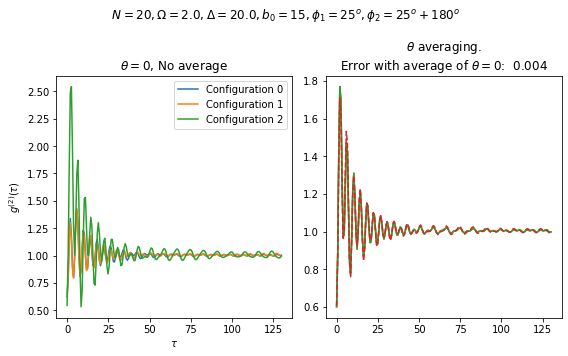

In [50]:
fig = plt.figure(figsize = (8,5))

plt.subplot(1,2,1)
plt.suptitle(f" $ N = {N}, \Omega = {Omega}, \Delta = {Delta}, b_0 = {b0} , \phi_1 = 25^o, \phi_2 = 25^o+180^o $ ", size = "large")

taulist, g2_theta_avg_all_configurations = get_averaged_in_theta_g2(experiments, single_excitation = False)

for run_num in range(0, len(experiments)):
    configuration = run_num
    g2_double_excitation_in_plane_for_a_given_configuration = np.abs(get_g2_from_experiment_and_angle(experiments, run_num, 0, double_excitation_dynamics = True)) 
    plt.plot(taulist*26, g2_double_excitation_in_plane_for_a_given_configuration, label = f"Configuration {run_num}")
    

plt.legend()
plt.title(r"$\theta = 0$, No average")
plt.ylabel(r"$g^{(2)}(\tau)$")
plt.xlabel(r"$\tau$")

plt.subplot(1,2,2)

  
for run_num in range(0, len(experiments)):
    configuration = run_num
    g2_theta_avg_for_given_configuration = g2_theta_avg_all_configurations[configuration]
    plt.plot(taulist*26, np.abs(g2_theta_avg_for_given_configuration), label = f"Configuration {run_num}")

in_plane_average = np.average([np.abs(get_g2_from_experiment_and_angle(experiments, run_num, 0, double_excitation_dynamics = True)) 
                                 for run_num in range(len(experiments))],axis = 0)

plt.plot(taulist*26, in_plane_average, "--")
 


relative_error_between_avg_of_theta_zero_and_theta_avg = relative_error(in_plane_average, g2_theta_avg_for_given_configuration) 

title = r"$\theta$ averaging." +  "\n" + r"Error with average of $\theta=0$:  " + str(np.round(relative_error_between_avg_of_theta_zero_and_theta_avg, 3)) 
plt.title(title)

plt.tight_layout()

plt.savefig(f"ashowing_theta_averages_works_N{N}.png", dpi = 400)

Comparing in-plane against theta averaging

In [ ]:
#b0_s =np.arange(11.00,18,0.50)
b0_s = [".10", "5.00", "7.00" ]

description = "MC_npy_ind_avg"

experiments_b0 = []
for i in range(len(b0_s)):
    b0 = b0_s[i]
    # b0 = "%0.2f" % b0
    print(i)
    
    experiments = get_experiments_data(N, Omega, Delta = Delta, b0 = b0, description = description, start_index=0, end_index=7)
    experiments_b0.append(experiments)
    

In [ ]:
fig = plt.figure(figsize = (10,7))

plt.subplot(1,2,1)
plt.suptitle(f" $ N = {N}, \Omega = {Omega}, \Delta = {Delta}, b_0 = changing , \phi_1 = 25^o, \phi_2 = 25^o+180^o $ \n Comparing in-plane averaging with theta averaging", size = "large")

b0_s = np.arange(11.00,19,0.50)
b0_s = [0.1, 5, 7]
#b0_s = [5]

kd_s = [get_radius_from_optical_thickness(N,b0) for b0 in b0_s]

for i in range(len(kd_s)):
    kd = kd_s[i]
    b0 = b0_s[i]
    
    
    
    try:
        plt.subplot(2,4,i+1)
    except:
        break

    plt.title(f"$kd$ = {np.round(kd,3)}, $b_0$ = {b0} ")
    plt.ylabel(r"$g^{(2)}(\tau)$")
    plt.xlabel(r"$\tau$")

    experiments = experiments_b0[i]
    taulist, g2_theta_avg_all_configurations = get_averaged_in_theta_g2(experiments, single_excitation = False)
    
    in_plane_average = np.abs(np.average([np.abs(get_g2_from_experiment_and_angle(experiments, run_num, 0, double_excitation_dynamics = True)) 
                                 for run_num in range(len(experiments))],axis = 0))

    plt.plot(taulist*26, in_plane_average, c="black")

    
    i1 = 0
    i2 = 5
    #plt.plot(taulist*26, np.abs(g2_theta_avg_all_configurations[i1]), label = f"Spatial configuration {i1}")
    #plt.plot(taulist*26, np.abs(g2_theta_avg_all_configurations[i2]), label = f"Spatial configuration {i2}")

    plt.ylim(0,20)
    for run_num in range(0, len(experiments)):
        configuration = run_num
        g2_theta_avg_for_given_configuration = g2_theta_avg_all_configurations[configuration]
        plt.plot(taulist*26, np.abs(g2_theta_avg_for_given_configuration), label = f"Spatial configuration {run_num}")

    #plt.legend()
    
    relative_error_between_avg_of_theta_zero_and_theta_avg = relative_error(in_plane_average, g2_theta_avg_for_given_configuration) 

    s = r"$Error_{rel}$="+ f"{np.round(relative_error_between_avg_of_theta_zero_and_theta_avg, 3)}"
    #plt.text(10, np.max(np.abs(in_plane_average))*0.90,s  )
    
    
    
plt.tight_layout()

#plt.savefig(f"showing_theta_averages_works_N{N}.png", dpi = 400)

Showing the small error in the $\theta$ averaging case in each configuration with respect to the mean (of all configurations)

In [ ]:
g2_theta_avg_all_configurations_average =  np.average(g2_theta_avg_all_configurations,axis=0)
relative_error_of_theta_averaged_configurations = [relative_error(g2_theta_avg_all_configurations_average, g2_theta_avg_all_configurations[i]) for i in range(len(experiments))]

plt.barh(range(len(experiments)),relative_error_of_theta_averaged_configurations)
plt.ylabel(r"Configuration")
plt.xlabel(r"Relative error of each $\theta$ averaged configuration with respect to mean")

Let's see the error between each $\theta$ run and its $\theta$ averaged mean

In [ ]:
taulist, g2_theta_avg_all_configurations = get_averaged_in_theta_g2(experiments, single_excitation = False)
taulist, g2_theta_avg_all_configurations_single_excitation = get_averaged_in_theta_g2(experiments, single_excitation = True)


fig = plt.figure(figsize = (10,16))


configuration = 5
num_of_angles = 90
thetas = np.float32(np.int32(np.linspace(0,360, num_of_angles)))
error_of_each_angle_with_average = np.zeros_like(thetas)



for run_num in range(0, len(experiments)):

    configuration = run_num
    plt.subplot(len(experiments), 2, 2*configuration+1 )

    g2_theta_avg_for_given_configuration = g2_theta_avg_all_configurations[configuration]

    for angle in range(len(thetas)):
        g2_double_excitation_for_given_angle_and_configuration = np.abs(get_g2_from_experiment_and_angle(experiments, configuration, angle, double_excitation_dynamics = True)) 
        plt.plot(taulist*26, g2_double_excitation_for_given_angle_and_configuration)
        error_of_each_angle_with_average[angle] = relative_error(g2_theta_avg_for_given_configuration,
                                                                 g2_double_excitation_for_given_angle_and_configuration)

    plt.plot(taulist*26, np.abs(g2_theta_avg_for_given_configuration), "*")


    #plt.plot(taulist, np.abs(get_g2_from_experiment_and_angle(experiments, configuration, 0) ))

    #plt.legend()
    plt.suptitle(f" $ N = {N}, \Omega = {Omega}, \Delta = {Delta}, b_0 = {b0} , \phi_1 = 25^o, \phi_2 = 25^o+180^o $ ", size = "large")

    plt.title(f" Configuration {configuration}. Plot for each"  + r" $\theta$")        
    plt.ylabel(r"$g^{(2)}(\tau)$")
    plt.xlabel(r" $\tau$ [ns]")

    plt.subplot(len(experiments), 2, 2*configuration+2)

    plt.ylim(0,32)
    plt.yticks([0,5,10,15,20])
    plt.grid()
    plt.hist(error_of_each_angle_with_average, 20)
    plt.xlabel(r"Error of each angle with respect to average")


plt.tight_layout()




In [ ]:
from scipy.signal import  argrelextrema
import scipy.optimize

In [ ]:
def monoExp(x, m, t):
    return m * np.exp(-t * x) + 1

In [ ]:
def get_decay_rate_using_extrema(x,y):
    extrema = argrelextrema(y, np.greater, order = 2)
    p0 = (1, 1) # start with values near those we expect
    params, cv = scipy.optimize.curve_fit(monoExp, x[extrema], y[extrema], p0)
    m, lam = params
    
    return params


In [ ]:
taulist_ns = taulist*26

plt.plot(taulist_ns, np.average(g2_theta_avg_all_configurations, axis = 0), "-o" , label = "Double excitation average")


extrema = argrelextrema(np.average(g2_theta_avg_all_configurations, axis = 0), np.greater, order = 2)
taulist_extrema = taulist_ns[extrema]
g2_theta_extrema = np.average(g2_theta_avg_all_configurations, axis = 0)[extrema]
plt.plot(taulist_extrema, g2_theta_extrema, "*" )


p0 = (1, 1) # start with values near those we expect
params, cv = scipy.optimize.curve_fit(monoExp, taulist_extrema, g2_theta_extrema, p0)
m, lam = params
plt.plot(taulist_ns[extrema[0][0]:], monoExp(taulist_ns[extrema[0][0]:], *params))


#plt.ylim(0.5,2)
plt.legend()

plt.suptitle(f" $ N = {N}, \Omega = {Omega}, \Delta = {Delta}, b_0 = {b0} , \phi_1 = 25^o, \phi_2 = 25^o+180^o $ and averaging in"  + r" $\theta$", size = "large")
plt.ylabel(r"$g^{(2)}(\tau)$")
plt.xlabel(r" $\tau$ [ns]")


In [ ]:
b0_s = np.arange(11,18,0.5)#range(11,19,0.5)
N = 6
#description = "full_sh_implementation_avg" #testing_steady_state_foda_avg
description = "MC_npy_avg"
#experiments[realização i][angulo j]
r_s = [get_radius_from_optical_thickness(N, b0) for b0 in b0_s]
g2_single_excitation = np.zeros([len(b0_s)+1, len(taulist)], dtype = "complex")
g2_double_excitation = np.zeros([len(b0_s)+1, len(taulist)], dtype = "complex")


decay_rates_double_excitation = np.zeros([len(b0_s)+1])
decay_rates_single_excitation = np.zeros([len(b0_s)+1])


cs_single_excitation = np.zeros([len(b0_s)+1, len(taulist)], dtype = "complex")
cs_double_excitation = np.zeros([len(b0_s)+1, len(taulist)], dtype = "complex")

Omega = 0.5
Delta = 20.0 


i = 0
for b0 in b0_s:

    experiments = get_experiments_data(N, Omega, Delta = 20.0, b0 = "%0.2f" %b0, description = description, start_index=3, end_index=11)
    taulist, g2_theta_avg_all_configurations = get_averaged_in_theta_g2(experiments, single_excitation = False)
    taulist, g2_theta_avg_all_configurations_single_excitation = get_averaged_in_theta_g2(experiments, single_excitation = True)
    
    g2_single_excitation[i] = np.average(g2_theta_avg_all_configurations_single_excitation,axis = 0) 
    g2_double_excitation[i] = np.average(g2_theta_avg_all_configurations,axis = 0) 
    
    
    m, lam = get_decay_rate_using_extrema(taulist,g2_single_excitation[i])
    decay_rates_single_excitation[i] = lam
    
    
    m, lam = get_decay_rate_using_extrema(taulist,g2_double_excitation[i])
    decay_rates_double_excitation[i] = lam
    
    
    
    i += 1
    
    
    

In [ ]:
decay_rates_double_excitation

In [53]:
kd_s = [get_radius_from_optical_thickness(N,b0) for b0 in b0_s]

#plt.plot(b0_s,decay_rates_double_excitation[:-1])
#plt.plot(b0_s,decay_rates_single_excitation[:-1])

plt.scatter(kd_s,decay_rates_double_excitation[:-1])
plt.scatter(kd_s,decay_rates_single_excitation[:-1])

plt.suptitle(f" $ N = {N}, \Omega = {Omega}, \Delta = {Delta}, \phi_1 = 25^o, \phi_2 = 25^o+180^o $ and averaging in"  + r" $\theta$", size = "large")
plt.title(R"$g^{(2)}(\tau)$ decay rates")

plt.ylabel(r"$\Gamma_{g^{(2)(\tau)}}/\Gamma$", size = "large")
plt.xlabel("$kd$")
plt.tight_layout()

NameError: name 'b0_s' is not defined

Comparing single and double excitation 

/home/roberto/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


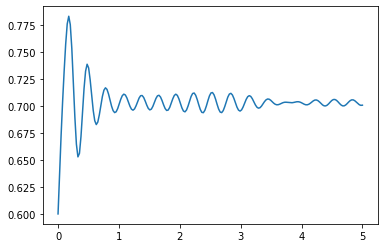

In [186]:
y = np.average(np.reshape(g2_theta_avg_all_configurations_single_excitation, [len(g2_theta_avg_all_configurations_single_excitation),len(g2_theta_avg_all_configurations_single_excitation[0])]), 0)
plt.plot(taulist, y)

In [182]:
len(g2_theta_avg_all_configurations_single_excitation)

3

In [172]:
taulist, g2_theta_avg_all_configurations_single_excitation = get_averaged_in_theta_g2(experiments_s, double_excitation_simulation =  False, single_excitation = True)

In [173]:
taulist, g2_theta_avg_all_configurations_single_excitation_in_double_excitation = get_averaged_in_theta_g2(experiments_d_and_s, double_excitation_simulation = True, single_excitation = True)
taulist, g2_theta_avg_all_configurations_double_excitation = get_averaged_in_theta_g2(experiments_d_and_s, double_excitation_simulation =  True, single_excitation = False)

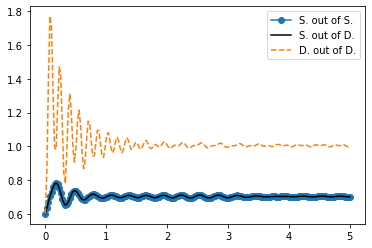

In [179]:
plt.plot(taulist, np.abs(g2_theta_avg_all_configurations_single_excitation[2]), "-o", label = "S. out of S." )
plt.plot(taulist, np.abs(g2_theta_avg_all_configurations_single_excitation_in_double_excitation[2]), "-0", label = "S. out of D.")
plt.plot(taulist, np.abs(g2_theta_avg_all_configurations_double_excitation[2]), "--", label = "D. out of D.")

plt.legend()

In [ ]:
g2_theta_avg_all_configurations_single_excitation[2]

In [ ]:
plt.plot(taulist, np.abs(g2_theta_avg_all_configurations_single_excitation[2]))
plt.plot(taulist, np.abs(g2_theta_avg_all_configurations_double_excitation[2]))

In [ ]:
g2_theta_avg_all_configurations_single_excitation[3]-g2_theta_avg_all_configurations_double_excitation[3]

In [52]:
fig = plt.figure(figsize = (10,5))

plt.suptitle("Relative error between single and double excitation")
for i in range(len(kd_s)):
    kd = kd_s[i]
    b0 = b0_s[i]
    plt.subplot(2,4,i+1)
    plt.title(f"$kd$ = {np.round(kd,3)}, $b_0$ = {b0} ")
    plt.plot(taulist, np.abs(g2_double_excitation[i]), "-")
    plt.plot(taulist, np.abs(g2_single_excitation[i]), "--")
    avg_relative_error = relative_error(np.abs(g2_double_excitation[i]),np.abs(g2_single_excitation[i]))
    s = r"$Error_{relative}$="+ f"{np.round(avg_relative_error, 2)}"
    plt.text(0.7, np.max(np.abs(g2_double_excitation[i]))*0.80,s  )

    plt.ylim(0.5,3)
plt.tight_layout()
    

NameError: name 'kd_s' is not defined

<Figure size 720x360 with 0 Axes>

Comparing in-plane against theta averaging